# Customer Churn Prediction

Predict customer retention && customer who will be inactive

In [1]:
# %pip install pycaret

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('final_dataset.csv')
# df.pd.read_csv('final.csv')
# print(type(df))
# df = pd.read_csv('/PERSONALIZED_MKT/PERSONAL/Mobile/Churn_Modelling.csv')

In [4]:
df

,TMB_CUST_ID,PCI_CARD_NMBR,CHURN,FLAG_MIB_ACT,CUST_SEGMENT,CUST_SEGMENT_RANGE,OCCUPATION_GRP,SEGMENT_OCC,MARITAL_STATUS_GRP,INCOME,...,SPENDING11,SPENDING12,RATIO45,RATIO56,RATIO67,RATIO78,RATIO89,RATIO90,RATIO01,RATIO12
0,001100000000000000000001284146,405016000102043000,0,1.0,5,01) AFFLUENT,08) พ่อบ้าน/แม่บ้าน [Housewife],OTHER,01) SINGLE,179578,...,NaN,NaN,NaN,NaN,NaN,1.288848,2.153331,0.920746,NaN,NaN
1,001100000000000000000011095423,405016000102052000,0,1.0,6,02) MIDINCOME,03) พนักงานเอกชน [Private Employee],PRIVATE EMPLOYEE,01) SINGLE,98000,...,NaN,1060.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,001100000000000000000011160366,405016000102061000,0,1.0,5,01) AFFLUENT,01) เจ้าของกิจการ [Owner Operator],SMALL BUSINESS OWNER,01) SINGLE,100000,...,26268.13,1683.47,NaN,NaN,1.400546,NaN,NaN,NaN,NaN,15.603563
3,001100000000000000000008216707,405016000102070000,0,1.0,5,01) AFFLUENT,01) เจ้าของกิจการ [Owner Operator],SMALL BUSINESS OWNER,01) SINGLE,92000,...,24448.34,71931.67,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.081396,0.339883
4,001100000000000000000010433854,405016000102088000,0,1.0,5,01) AFFLUENT,99) NA,OTHER,02) MARRIED,100000,...,102557.59,139991.70,1.774443,0.673621,1.640631,1.139531,0.842415,0.807738,1.382081,0.732598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715766,001100000000000000000019222731,542691090104031390,0,1.0,6,02) MIDINCOME,99) NA,OTHER,03) DIVORCE,20000,...,118.93,110.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.073085
715767,001100000000000000000007808899,542691095102181195,0,1.0,6,02) MIDINCOME,03) พนักงานเอกชน [Private Employee],PRIVATE EMPLOYEE,01) SINGLE,25000,...,2096.28,2096.28,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
715768,001100000000000000000016874299,542691096103108296,0,NaN,6,02) MIDINCOME,03) พนักงานเอกชน [Private Employee],PRIVATE EMPLOYEE,02) MARRIED,50000,...,1031.55,1031.55,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
715769,001100000000000000000023115773,542691096107248696,0,1.0,6,02) MIDINCOME,03) พนักงานเอกชน [Private Employee],PRIVATE EMPLOYEE,01) SINGLE,50000,...,95.98,87.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.097290


In [5]:
df = df.replace(np.nan, 0)

In [6]:
df.fillna(0, inplace=True)

In [7]:
df

,TMB_CUST_ID,PCI_CARD_NMBR,CHURN,FLAG_MIB_ACT,CUST_SEGMENT,CUST_SEGMENT_RANGE,OCCUPATION_GRP,SEGMENT_OCC,MARITAL_STATUS_GRP,INCOME,...,SPENDING11,SPENDING12,RATIO45,RATIO56,RATIO67,RATIO78,RATIO89,RATIO90,RATIO01,RATIO12
0,001100000000000000000001284146,405016000102043000,0,1.0,5,01) AFFLUENT,08) พ่อบ้าน/แม่บ้าน [Housewife],OTHER,01) SINGLE,179578,...,0.00,0.00,0.000000,0.000000,0.000000,1.288848,2.153331,0.920746,0.000000,0.000000
1,001100000000000000000011095423,405016000102052000,0,1.0,6,02) MIDINCOME,03) พนักงานเอกชน [Private Employee],PRIVATE EMPLOYEE,01) SINGLE,98000,...,0.00,1060.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,001100000000000000000011160366,405016000102061000,0,1.0,5,01) AFFLUENT,01) เจ้าของกิจการ [Owner Operator],SMALL BUSINESS OWNER,01) SINGLE,100000,...,26268.13,1683.47,0.000000,0.000000,1.400546,0.000000,0.000000,0.000000,0.000000,15.603563
3,001100000000000000000008216707,405016000102070000,0,1.0,5,01) AFFLUENT,01) เจ้าของกิจการ [Owner Operator],SMALL BUSINESS OWNER,01) SINGLE,92000,...,24448.34,71931.67,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.081396,0.339883
4,001100000000000000000010433854,405016000102088000,0,1.0,5,01) AFFLUENT,99) NA,OTHER,02) MARRIED,100000,...,102557.59,139991.70,1.774443,0.673621,1.640631,1.139531,0.842415,0.807738,1.382081,0.732598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715766,001100000000000000000019222731,542691090104031390,0,1.0,6,02) MIDINCOME,99) NA,OTHER,03) DIVORCE,20000,...,118.93,110.83,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.073085
715767,001100000000000000000007808899,542691095102181195,0,1.0,6,02) MIDINCOME,03) พนักงานเอกชน [Private Employee],PRIVATE EMPLOYEE,01) SINGLE,25000,...,2096.28,2096.28,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
715768,001100000000000000000016874299,542691096103108296,0,0.0,6,02) MIDINCOME,03) พนักงานเอกชน [Private Employee],PRIVATE EMPLOYEE,02) MARRIED,50000,...,1031.55,1031.55,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
715769,001100000000000000000023115773,542691096107248696,0,1.0,6,02) MIDINCOME,03) พนักงานเอกชน [Private Employee],PRIVATE EMPLOYEE,01) SINGLE,50000,...,95.98,87.47,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.097290


In [8]:
#dropping unnecessary columns 
df = df.drop(columns = ['PCI_CARD_NMBR','TMB_CUST_ID','OPENED_DATE'])

In [9]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [10]:
# df['PRODUCT_CODE_DETAIL']
# df['PRODUCT_CODE_DETAIL'].isnull()
# print(df['PRODUCT_CODE_DETAIL'])
df['PRODUCT_CODE_DETAIL'] = df['PRODUCT_CODE_DETAIL'].astype(str)
df['GENDER_CD'] = df['GENDER_CD'].astype(str)
df['CATEGORY_X4'] = df['CATEGORY_X4'].astype(str)
df['CATEGORY_X5'] = df['CATEGORY_X5'].astype(str)
df['CATEGORY_X6'] = df['CATEGORY_X6'].astype(str)
df['CATEGORY_X7'] = df['CATEGORY_X7'].astype(str)
df['CATEGORY_X8'] = df['CATEGORY_X8'].astype(str)
df['CATEGORY_X9'] = df['CATEGORY_X9'].astype(str)
df['CATEGORY_X10'] = df['CATEGORY_X10'].astype(str)
df['CATEGORY_X11'] = df['CATEGORY_X11'].astype(str)
df['CATEGORY_X12'] = df['CATEGORY_X12'].astype(str)

In [11]:
df.info()
# print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715771 entries, 0 to 715770
Data columns (total 80 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CHURN                715771 non-null  int64  
 1   FLAG_MIB_ACT         715771 non-null  float64
 2   CUST_SEGMENT         715771 non-null  int64  
 3   CUST_SEGMENT_RANGE   715771 non-null  object 
 4   OCCUPATION_GRP       715771 non-null  object 
 5   SEGMENT_OCC          715771 non-null  object 
 6   MARITAL_STATUS_GRP   715771 non-null  object 
 7   INCOME               715771 non-null  int64  
 8   INCOME_RANGE         715771 non-null  object 
 9   EDUCATION_LEVEL      715771 non-null  object 
 10  PRODUCT_CODE_DETAIL  715771 non-null  object 
 11  TIME_CC_HOLDER       715771 non-null  float64
 12  CUR_BAL_POINT        715771 non-null  float64
 13  GENDER_CD            715771 non-null  object 
 14  SALARY               715771 non-null  int64  
 15  AGE              

In [12]:
df['CUST_SEGMENT_RANGE'] = label.fit_transform(df['CUST_SEGMENT_RANGE'])
df['OCCUPATION_GRP'] = label.fit_transform(df['OCCUPATION_GRP'])
df['SEGMENT_OCC'] = label.fit_transform(df['SEGMENT_OCC'])
df['MARITAL_STATUS_GRP'] = label.fit_transform(df['MARITAL_STATUS_GRP'])
df['INCOME_RANGE'] = label.fit_transform(df['INCOME_RANGE'])
df['EDUCATION_LEVEL'] = label.fit_transform(df['EDUCATION_LEVEL'])
df['PRODUCT_CODE_DETAIL'] = label.fit_transform(df['PRODUCT_CODE_DETAIL'])
df['GENDER_CD'] = label.fit_transform(df['GENDER_CD'])
df['AGE_RANGE'] = label.fit_transform(df['AGE_RANGE'])
df['CATEGORY_X4'] = label.fit_transform(df['CATEGORY_X4'])
df['CATEGORY_X5'] = label.fit_transform(df['CATEGORY_X5'])
df['CATEGORY_X6'] = label.fit_transform(df['CATEGORY_X6'])
df['CATEGORY_X7'] = label.fit_transform(df['CATEGORY_X7'])
df['CATEGORY_X8'] = label.fit_transform(df['CATEGORY_X8'])
df['CATEGORY_X9'] = label.fit_transform(df['CATEGORY_X9'])
df['CATEGORY_X10'] = label.fit_transform(df['CATEGORY_X10'])
df['CATEGORY_X11'] = label.fit_transform(df['CATEGORY_X11'])
df['CATEGORY_X12'] = label.fit_transform(df['CATEGORY_X12'])

# df.iloc[:,3] = label.fit_transform(df.iloc[:,3].values)
# df.iloc[:,4] = label.fit_transform(df.iloc[:,4].values)
# df.iloc[:,5] = label.fit_transform(df.iloc[:,5].values)
# df.iloc[:,6] = label.fit_transform(df.iloc[:,6].values)
# df.iloc[:,8] = label.fit_transform(df.iloc[:,8].values)
# df.iloc[:,9] = label.fit_transform(df.iloc[:,9].values)
# df.iloc[:,10] = label.fit_transform(df.iloc[:,10].values)
# df.iloc[:,13] = label.fit_transform(df.iloc[:,13].values)
# df.iloc[:,16] = label.fit_transform(df.iloc[:,16].values)
# df.iloc[:,18] = label.fit_transform(df.iloc[:,18].values)
# df.iloc[:,19] = label.fit_transform(df.iloc[:,19].values)
# df.iloc[:,20] = label.fit_transform(df.iloc[:,20].values)
# df.iloc[:,21] = label.fit_transform(df.iloc[:,21].values)
# df.iloc[:,22] = label.fit_transform(df.iloc[:,22].values)
# df.iloc[:,23] = label.fit_transform(df.iloc[:,23].values)
# df.iloc[:,24] = label.fit_transform(df.iloc[:,24].values)
# df.iloc[:,25] = label.fit_transform(df.iloc[:,25].values)
# df.iloc[:,26] = label.fit_transform(df.iloc[:,26].values)  


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715771 entries, 0 to 715770
Data columns (total 80 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CHURN                715771 non-null  int64  
 1   FLAG_MIB_ACT         715771 non-null  float64
 2   CUST_SEGMENT         715771 non-null  int64  
 3   CUST_SEGMENT_RANGE   715771 non-null  int64  
 4   OCCUPATION_GRP       715771 non-null  int64  
 5   SEGMENT_OCC          715771 non-null  int64  
 6   MARITAL_STATUS_GRP   715771 non-null  int64  
 7   INCOME               715771 non-null  int64  
 8   INCOME_RANGE         715771 non-null  int64  
 9   EDUCATION_LEVEL      715771 non-null  int64  
 10  PRODUCT_CODE_DETAIL  715771 non-null  int64  
 11  TIME_CC_HOLDER       715771 non-null  float64
 12  CUR_BAL_POINT        715771 non-null  float64
 13  GENDER_CD            715771 non-null  int64  
 14  SALARY               715771 non-null  int64  
 15  AGE              

In [14]:
df.head(5)

,CHURN,FLAG_MIB_ACT,CUST_SEGMENT,CUST_SEGMENT_RANGE,OCCUPATION_GRP,SEGMENT_OCC,MARITAL_STATUS_GRP,INCOME,INCOME_RANGE,EDUCATION_LEVEL,...,SPENDING11,SPENDING12,RATIO45,RATIO56,RATIO67,RATIO78,RATIO89,RATIO90,RATIO01,RATIO12
0,0,1.0,5,0,7,2,0,179578,4,3,...,0.00,0.00,0.000000,0.000000,0.000000,1.288848,2.153331,0.920746,0.000000,0.000000
1,0,1.0,6,1,2,3,0,98000,3,4,...,0.00,1060.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0,1.0,5,0,0,4,0,100000,3,3,...,26268.13,1683.47,0.000000,0.000000,1.400546,0.000000,0.000000,0.000000,0.000000,15.603563
3,0,1.0,5,0,0,4,0,92000,3,4,...,24448.34,71931.67,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.081396,0.339883
4,0,1.0,5,0,8,2,1,100000,3,3,...,102557.59,139991.70,1.774443,0.673621,1.640631,1.139531,0.842415,0.807738,1.382081,0.732598


In [15]:
print(f'Rows:',df.shape[0])     #Printing Rows 
print(f'Columns:',df.shape[1])  #Printing RColumns

Rows: 715771
Columns: 80


In [16]:
df.describe

<bound method NDFrame.describe of         CHURN  FLAG_MIB_ACT  CUST_SEGMENT  CUST_SEGMENT_RANGE  OCCUPATION_GRP  \
0           0           1.0             5                   0               7   
1           0           1.0             6                   1               2   
2           0           1.0             5                   0               0   
3           0           1.0             5                   0               0   
4           0           1.0             5                   0               8   
...       ...           ...           ...                 ...             ...   
715766      0           1.0             6                   1               8   
715767      0           1.0             6                   1               2   
715768      0           0.0             6                   1               2   
715769      0           1.0             6                   1               2   
715770      0           1.0             6                   1              

In [17]:
df.info()  #Checking data info/datatypes 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715771 entries, 0 to 715770
Data columns (total 80 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CHURN                715771 non-null  int64  
 1   FLAG_MIB_ACT         715771 non-null  float64
 2   CUST_SEGMENT         715771 non-null  int64  
 3   CUST_SEGMENT_RANGE   715771 non-null  int64  
 4   OCCUPATION_GRP       715771 non-null  int64  
 5   SEGMENT_OCC          715771 non-null  int64  
 6   MARITAL_STATUS_GRP   715771 non-null  int64  
 7   INCOME               715771 non-null  int64  
 8   INCOME_RANGE         715771 non-null  int64  
 9   EDUCATION_LEVEL      715771 non-null  int64  
 10  PRODUCT_CODE_DETAIL  715771 non-null  int64  
 11  TIME_CC_HOLDER       715771 non-null  float64
 12  CUR_BAL_POINT        715771 non-null  float64
 13  GENDER_CD            715771 non-null  int64  
 14  SALARY               715771 non-null  int64  
 15  AGE              

In [18]:
df.isnull().any()

CHURN                 False
FLAG_MIB_ACT          False
CUST_SEGMENT          False
CUST_SEGMENT_RANGE    False
OCCUPATION_GRP        False
                      ...  
RATIO78               False
RATIO89               False
RATIO90               False
RATIO01               False
RATIO12               False
Length: 80, dtype: bool

In [19]:
y = df['CHURN']

In [20]:
x = df.drop(columns = ['CHURN', 'OCCUPATION_GRP', 'SEGMENT_OCC', 'MARITAL_STATUS_GRP', 'INCOME',
'OCCUPATION_GRP', 'SEGMENT_OCC', 'MARITAL_STATUS_GRP', 'INCOME', 'INCOME_RANGE', 'EDUCATION_LEVEL', 
'PRODUCT_CODE_DETAIL',  'TIME_CC_HOLDER', 'CUR_BAL_POINT', 'GENDER_CD', 'AGE_RANGE', 'OCC_GROUP', 'SALARY',
'TMB_AVAIL_CREDIT04', 'TMB_AVAIL_CREDIT05', 'TMB_AVAIL_CREDIT06', 'TMB_AVAIL_CREDIT07', 'TMB_AVAIL_CREDIT08',
'TMB_AVAIL_CREDIT09', 'TMB_AVAIL_CREDIT10', 'TMB_AVAIL_CREDIT11', 'TMB_AVAIL_CREDIT12', 'TMB_CRLIMIT04',
'TMB_CRLIMIT05', 'TMB_CRLIMIT06', 'TMB_CRLIMIT07', 'TMB_CRLIMIT08', 'TMB_CRLIMIT09', 'TMB_CRLIMIT10',
'TMB_CRLIMIT11', 'TMB_CRLIMIT12', 'RATIO45', 'RATIO56', 'RATIO67', 'RATIO78', 'RATIO89', 'RATIO90',
'RATIO01', 'RATIO12'])

In [21]:
x

,FLAG_MIB_ACT,CUST_SEGMENT,CUST_SEGMENT_RANGE,AGE,CATEGORY_X4,CATEGORY_X5,CATEGORY_X6,CATEGORY_X7,CATEGORY_X8,CATEGORY_X9,...,FREQUENT12,SPENDING04,SPENDING05,SPENDING06,SPENDING07,SPENDING08,SPENDING09,SPENDING10,SPENDING11,SPENDING12
0,1.0,5,0,64,0,0,0,9,9,9,...,0.0,0.00,0.00,0.00,4341.15,3368.24,1564.20,1698.84,0.00,0.00
1,1.0,6,1,51,0,0,0,0,0,0,...,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1060.00
2,1.0,5,0,45,18,0,4,12,0,0,...,1.0,39770.00,0.00,30770.00,21970.00,0.00,0.00,0.00,26268.13,1683.47
3,1.0,5,0,48,28,28,28,28,28,28,...,5.0,1990.00,1990.00,1990.00,1990.00,1990.00,1990.00,1990.00,24448.34,71931.67
4,1.0,5,0,47,24,15,24,24,15,14,...,71.0,215532.47,121464.84,180316.32,109906.66,96449.06,114491.09,141742.92,102557.59,139991.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715766,1.0,6,1,42,0,0,0,0,0,0,...,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,118.93,110.83
715767,1.0,6,1,35,0,0,0,0,0,0,...,2.0,2096.28,2096.28,2096.28,2096.28,2096.28,2096.28,2096.28,2096.28,2096.28
715768,0.0,6,1,56,0,0,0,0,0,0,...,2.0,1031.55,1031.55,1031.55,1031.55,1031.55,1031.55,1031.55,1031.55,1031.55
715769,1.0,6,1,39,0,0,0,0,0,0,...,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,95.98,87.47


In [22]:
y

0         0
1         0
2         0
3         0
4         0
         ..
715766    0
715767    0
715768    0
715769    0
715770    0
Name: CHURN, Length: 715771, dtype: int64

<Axes: title={'center': 'Correlation index'}>

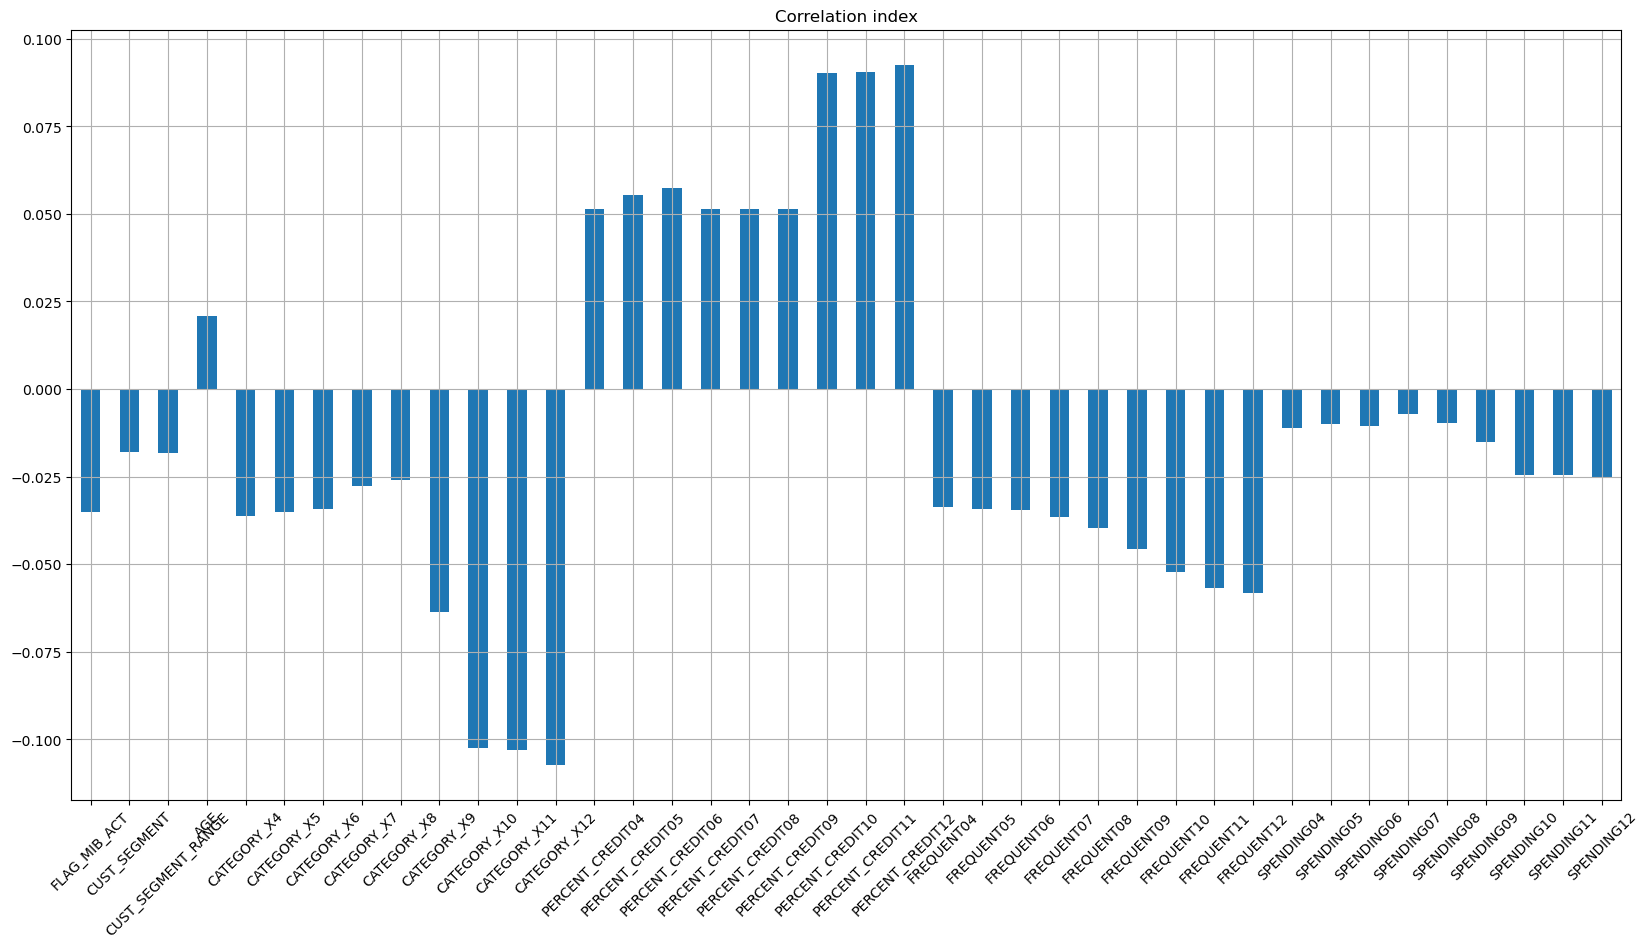

In [23]:
x.corrwith(df['CHURN']).plot.bar(figsize = (20,10), title = 'Correlation index', rot = 45, grid = True)

<Axes: >

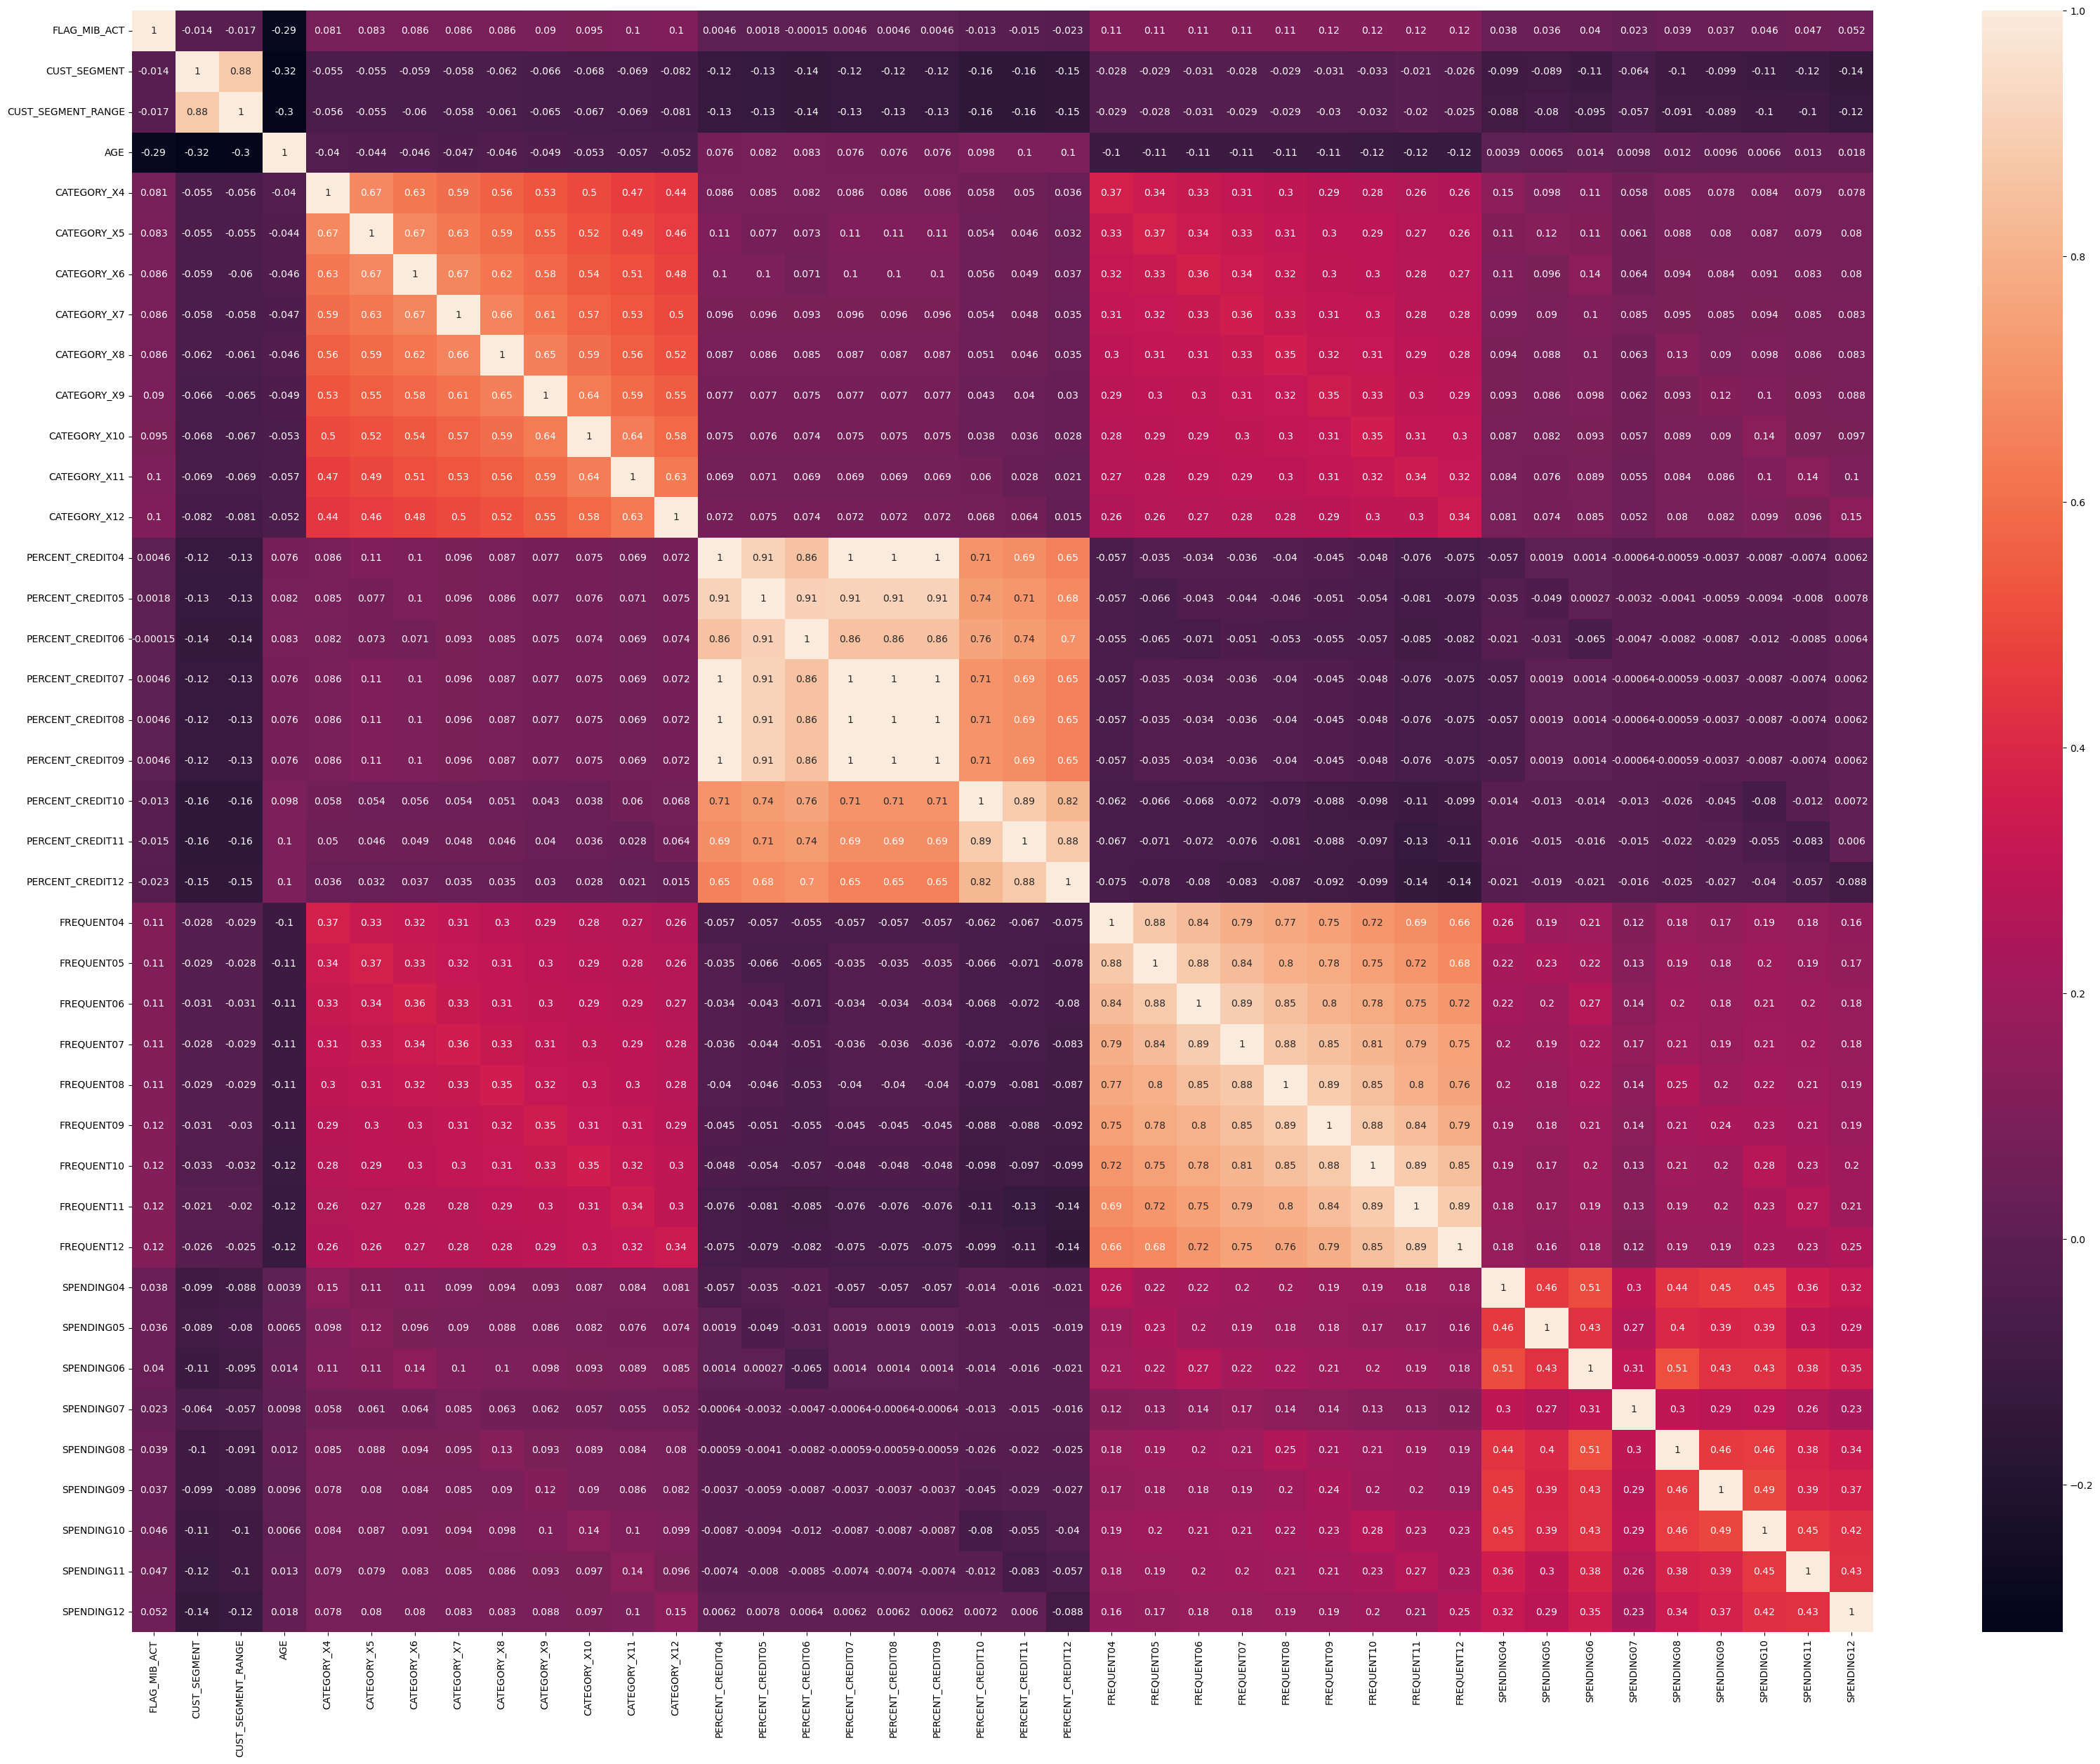

In [24]:
corr = x.corr()
plt.figure(figsize = (40,30))
sns.heatmap(corr, annot = True)

In [25]:
# sns.countplot(df['CHURN'], label='Count')
# plt.show()

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state = 45)

In [27]:
model_eval = pd.DataFrame(columns=['Score'])

In [28]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)
y_pred1 = log.predict(x_test)

In [29]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred2 = dt.predict(x_test)

In [30]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred3 = rf.predict(x_test)

In [31]:
model_eval.loc['Logisitic','Score'] = accuracy_score(y_pred1, y_test)
model_eval.loc['Decision Tree','Score'] = accuracy_score(y_pred2, y_test)
model_eval.loc['Random Forest','Score'] = accuracy_score(y_pred3, y_test)
# model_eval.loc['XGBoost','Score'] = accuracy_score(y_pred3,y_test)

In [32]:
accuracy = sum(y_pred1 == y_test) / len(y_test)
print("Accuracy Logisitic:", accuracy)

Accuracy Logisitic: 0.9886891356465467


In [33]:
accuracy = sum(y_pred2 == y_test) / len(y_test)
print("Accuracy Decision Tree:", accuracy)

Accuracy Decision Tree: 0.9856602381764026


In [34]:
accuracy = sum(y_pred3 == y_test) / len(y_test)
print("Accuracy Random Forest:", accuracy)

Accuracy Random Forest: 0.9890020844626501


In [35]:
model_eval

,Score
Logisitic,0.988689
Decision Tree,0.98566
Random Forest,0.989002


Confusion Matrix Logisitic: [[176916      9]
 [  2015      3]]


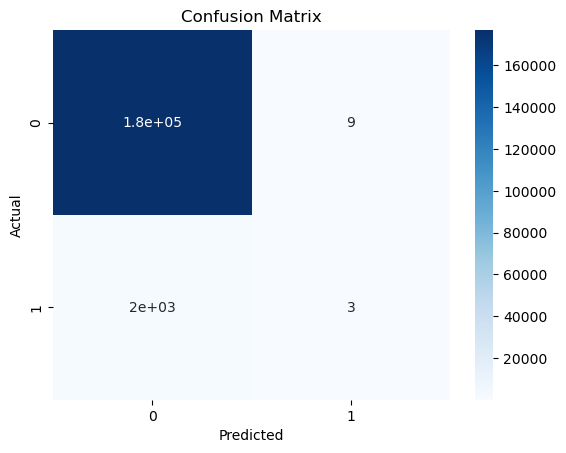

In [36]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix Logisitic:", cm1)

sns.heatmap(cm1, annot=True, cmap='Blues')

# customize the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# display the plot
plt.show()

Confusion Matrix Decision Tree: [[175619   1306]
 [  1260    758]]


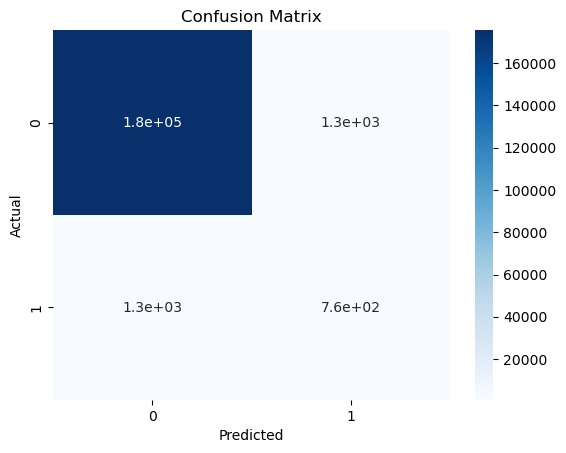

In [37]:
cm2 = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix Decision Tree:", cm2)

sns.heatmap(cm2, annot=True, cmap='Blues')

# customize the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# display the plot
plt.show()

Confusion Matrix Random Forest: [[176551    374]
 [  1594    424]]


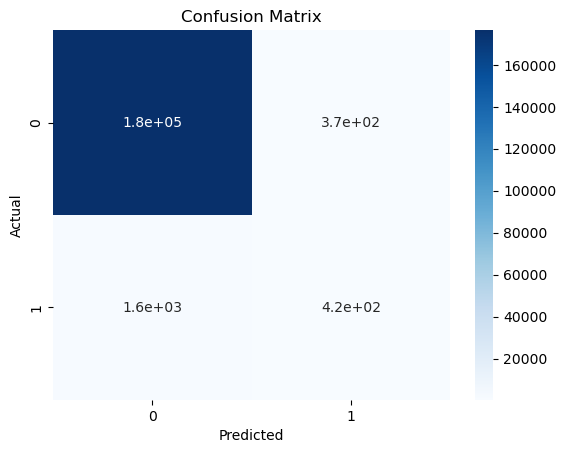

In [38]:
cm3 = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix Random Forest:", cm3)

sns.heatmap(cm3, annot=True, cmap='Blues')

# customize the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# display the plot
plt.show()

In [39]:
pip install pycaret

  Using cached pycaret-3.0.0-py3-none-any.whl (481 kB)
  Using cached plotly_resampler-0.8.3.2.tar.gz (46 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached category_encoders-2.6.0-py2.py3-none-any.whl (81 kB)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl (11 kB)
  Using cached sktime-0.17.0-py3-none-any.whl (16.1 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached tbats-1.1.2-py3-none-any.whl (43 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 MB 10.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.7 MB/s eta 0:00:00a 0:00:01
  Using cached schemdraw-0.16-py3-none-any.whl (105 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.3/607.3 kB 12.5 MB/s eta 0:00:0000:01
  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)
  Using cached pyod-1.0.9.tar.gz (149 kB)
  Preparing metadata (setup.py) ... done
  

  Using cached dash-2.9.2-py3-none-any.whl (10.2 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.2/185.2 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 5.4 MB/s eta 0:00:0000:0100:01
  Using cached jupyter_dash-0.4.2-py3-none-any.whl (23 kB)
  Using cached Cython-0.29.34-py2.py3-none-any.whl (988 kB)
  Using cached Deprecated-1.2.13-py2.py3-none-any.whl (9.6 kB)
  Using cached dash_core_components-2.0.0-py3-none-any.whl (3.8 kB)
  Using cached dash_table-5.0.0-py3-none-any.whl (3.9 kB)
  Using cached dash_html_components-2.0.0-py3-none-any.whl (4.1 kB)
  Using cached ansi2html-1.8.0-py3-none-any.whl (16 kB)
  Using cached retrying-1.3.4-py3-none-any.whl (11 kB)


  Created wheel for plotly-resampler: filename=plotly_resampler-0.8.3.2-cp310-cp310-macosx_12_0_x86_64.whl size=52190 sha256=ed62af01c6fd6399db91651b81605a824a3233f8ea2630ed06a357ba5c9d81cd
  Stored in directory: /Users/Mobile/Library/Caches/pip/wheels/98/28/a7/22e9c97d088da8bce7388071fda070b77df23816e7b6671f21
  Created wheel for pyod: filename=pyod-1.0.9-py3-none-any.whl size=184096 sha256=34544666a457eeec4597e13358a67c31edc1bfb8ba1f2c2a532e1e37895f8b56
  Stored in directory: /Users/Mobile/Library/Caches/pip/wheels/8a/a9/b2/5db1f8c7dce5b24cee7c7254d162261df6bd85231a51867f1c
Successfully built plotly-resampler pyod
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.3
    Uninstalling importlib-metadata-4.11.3:
      Successfully uninstalled importlib-metadata-4.11.3
Note: you may need to

In [40]:
# init setup
from pycaret.classification import *
clf = setup(data = ros_dataset, 
            target = 'CHURN', 
            normalize=True,
            remove_outliers=True, 
            fix_imbalance=True)

NameError: name 'ros_dataset' is not defined

In [ ]:
# Compare the performance of several classification models
best_model = compare_models()

In [ ]:
# print best_model parameters
print(best_model)

In [ ]:
# Create a logistic regression model
lr = create_model('lr')

In [ ]:
# Tune the hyperparameters of the logistic regression model
tuned_lr = tune_model(lr)

In [ ]:
# Evaluate the performance of the tuned logistic regression model
plot_model(tuned_lr, plot='confusion_matrix')
interpret_model(tuned_lr)

In [ ]:
# Save the tuned logistic regression model to a file
save_model(tuned_lr, 'tuned_lr_model')

In [ ]:
import joblib
joblib.dump(log,"model")

In [ ]:
log.feature_importances_

In [ ]:
rf.feature_importances_

In [ ]:
weights = pd.DataFrame(rf.feature_importances_,index=x.columns.values)

In [ ]:
weights

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier()


In [ ]:
xg.fit(x_train,y_train)
y_pred3 = xg.predict(x_test)

In [ ]:
x=df.drop('CHURN', axis=1)
y = df['CHURN']

In [ ]:
#Feature scaling using Standard Scaler
# from sklearn.preprocessing import StandardScaler
sc =StandardScaler()


In [ ]:
x_train = sc.fit_transform(x_train)

In [ ]:
x_test = sc.transform(x_test)

In [ ]:
#Model using Logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

In [ ]:
x_test = sc.transform(x_test)

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix

In [ ]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [ ]:
results

In [ ]:
cm = confusion_matrix(y_pred,y_test)

In [ ]:
print(cm)

In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=lr, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

In [ ]:
#randomised search to find best parameters and builind the final model
from sklearn.model_selection import RandomizedSearchCV

parameters = {'penalty': ['l1','l2','elasticnet','none'],
             'C': [0.25,0.30,0.40,0.50,0.60,0.55, 0.75,1.0,1.25,1.50,1.75,2.0,5.0,10.0],
             'solver': ['newton-cg','saga','sag','lbfgs','liblinear']}
random_search = RandomizedSearchCV(estimator = lr, param_distributions = parameters, n_iter=10,
                                  scoring = 'roc_auc',n_jobs = -1,cv = 10, verbose = 3)


In [ ]:
random_search.fit(x_train, y_train)

In [ ]:
random_search.best_estimator_

In [ ]:
random_search.best_params_

In [ ]:
#final Model
from sklearn.linear_model import LogisticRegression
final_model = LogisticRegression(solver = 'sag', penalty = 'l2', C = 0.3)
final_model.fit(x_train,y_train)


In [ ]:
y_pred = final_model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


In [ ]:
results

In [ ]:
cm = confusion_matrix(y_pred,y_test)
print(cm)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=final_model, X=x_train, y=y_train, cv=10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))